In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data_df=pd.read_excel('Gas Data processed.xlsx',sheet_name="code_monthly")
df=data_df.loc[:,["months", "price_gas", "price_brent_gbp","open_interest_gas","lng", "storage","euas","supply"]] 
print(df)

     months  price_gas  price_brent_gbp  open_interest_gas       lng  \
0    Oct 09      36.81        44.242703              18582  1.340000   
1    Nov 09      29.57        46.579369              13795  1.270000   
2    Dec 09      33.72        46.014033              12590  1.670000   
3    Jan 10      38.77        47.677856              13650  1.540000   
4    Feb 10      31.34        48.582063              12720  1.330000   
..      ...        ...              ...                ...       ...   
145  Nov 21     238.31        60.870969              45540  1.387771   
146  Dec 21     170.64        54.947375              45135  2.011959   
147  Jan 22     203.08        64.543373              37335  3.146688   
148  Feb 22     237.78        72.629955              33040  2.051291   
149  Mar 22     299.32        89.238961              25101  2.154597   

      storage      euas     supply  
0   -0.200000   12.3590   6.430000  
1   -0.060000   11.1690   8.150000  
2    0.660000   10.6420 

price_gas


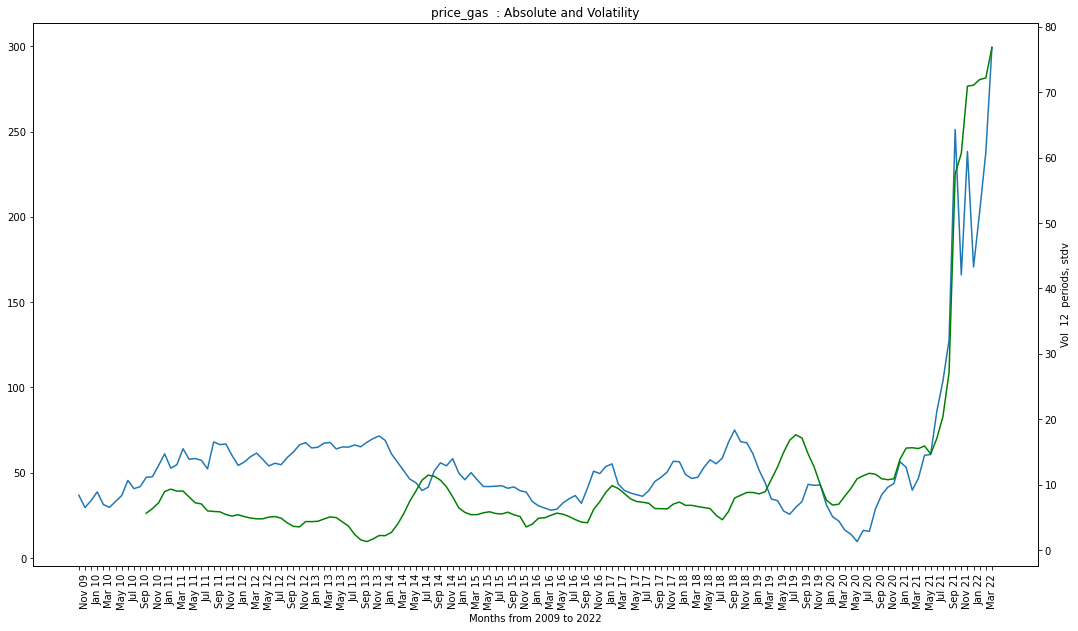

price_brent_gbp


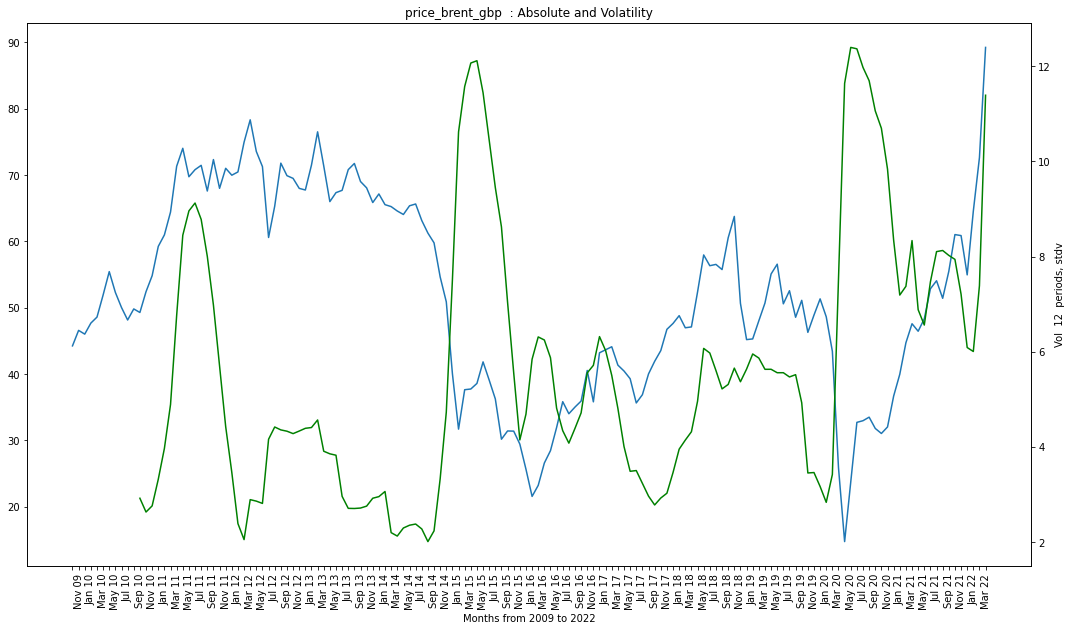

open_interest_gas


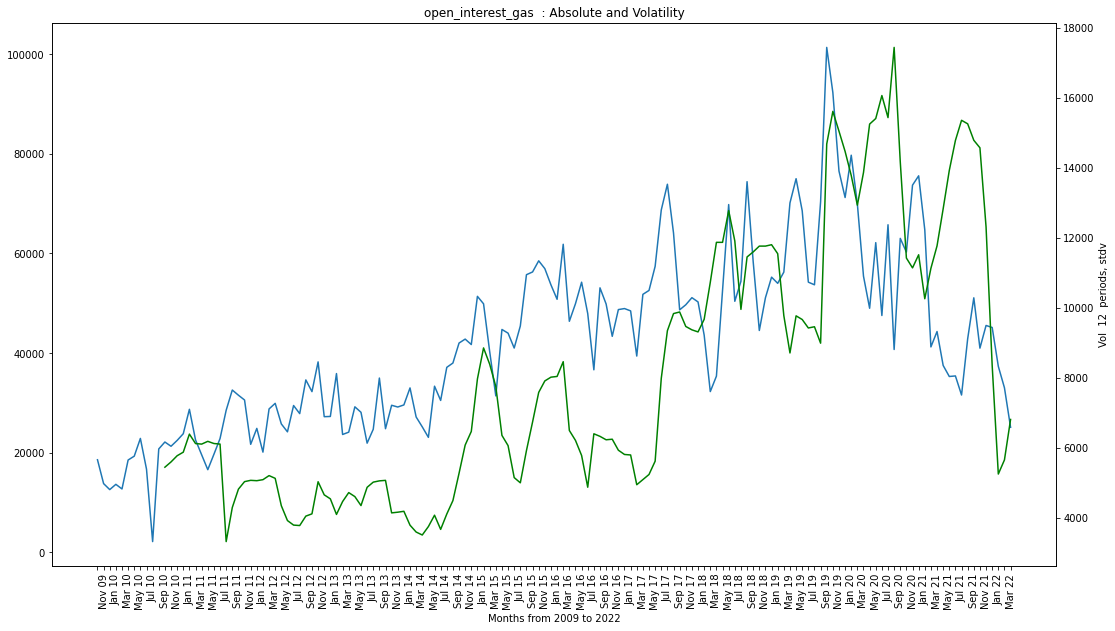

lng


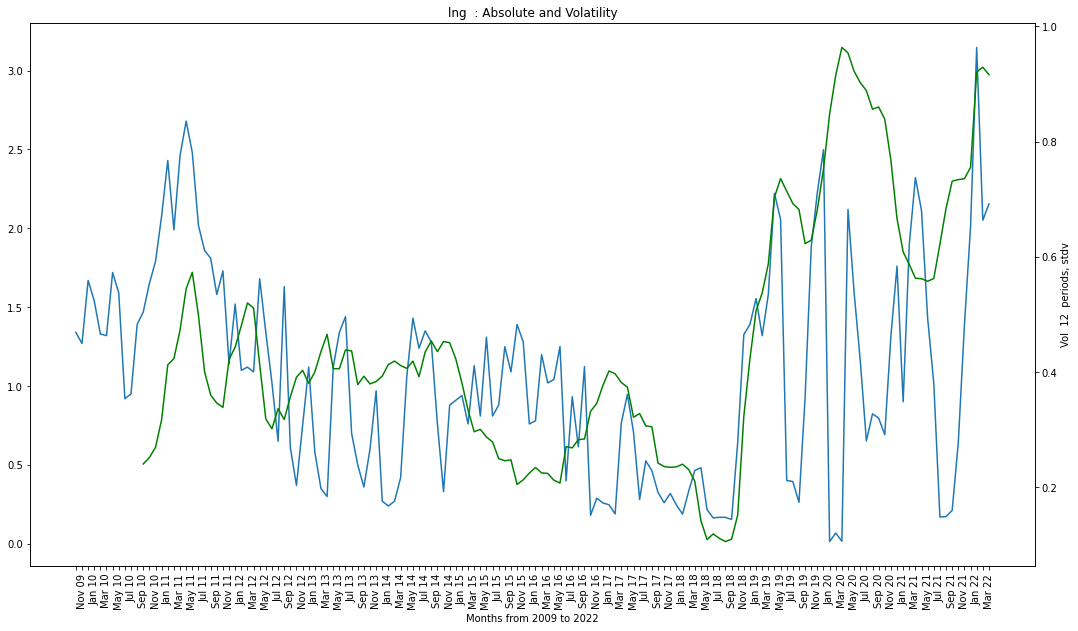

storage


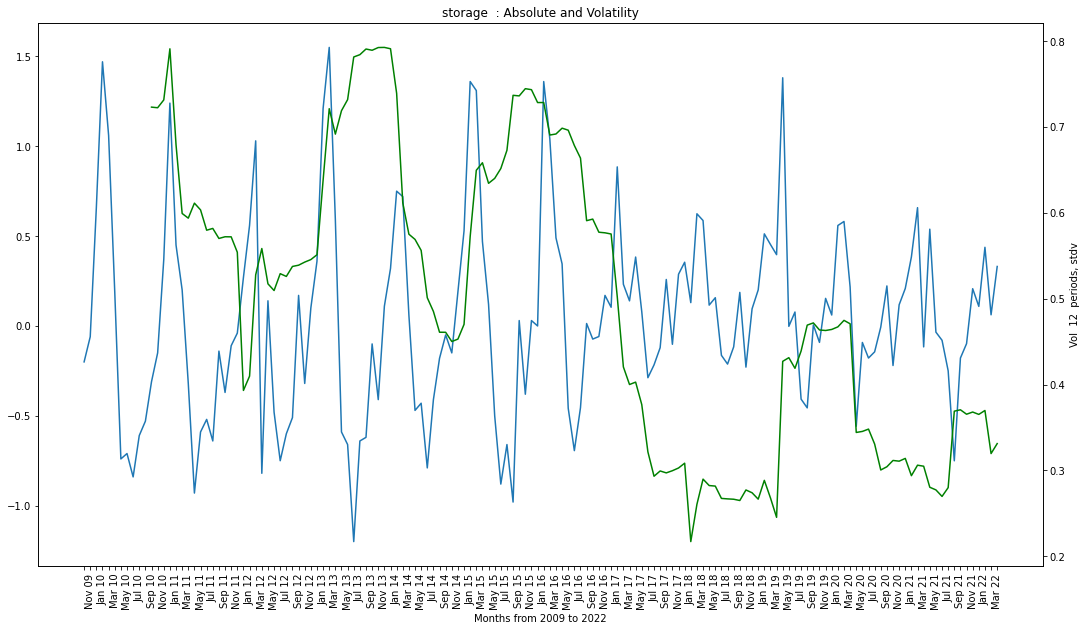

euas


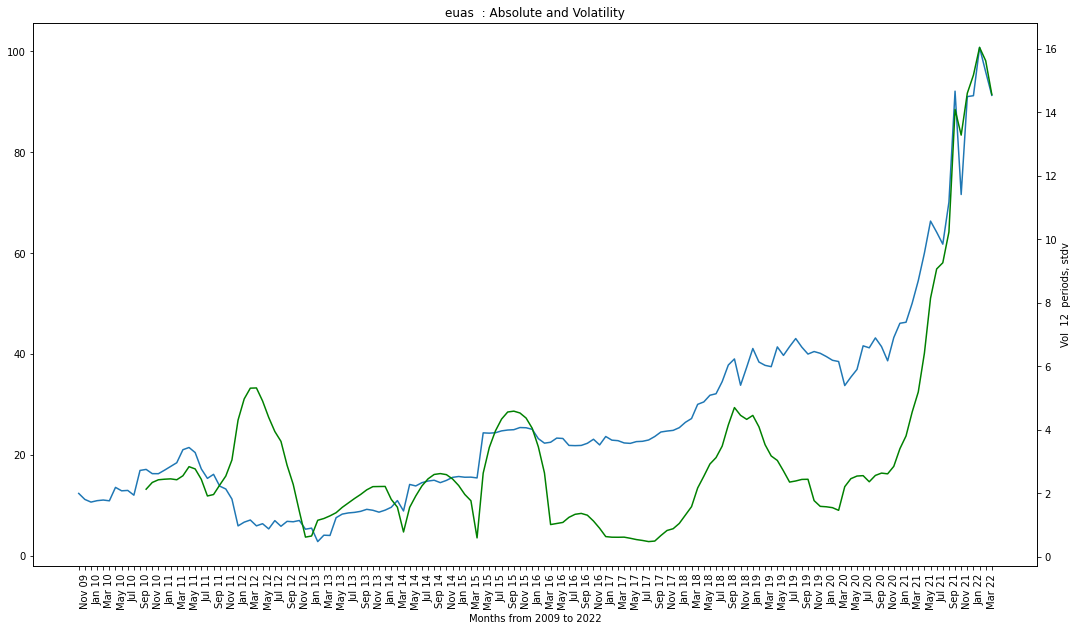

supply


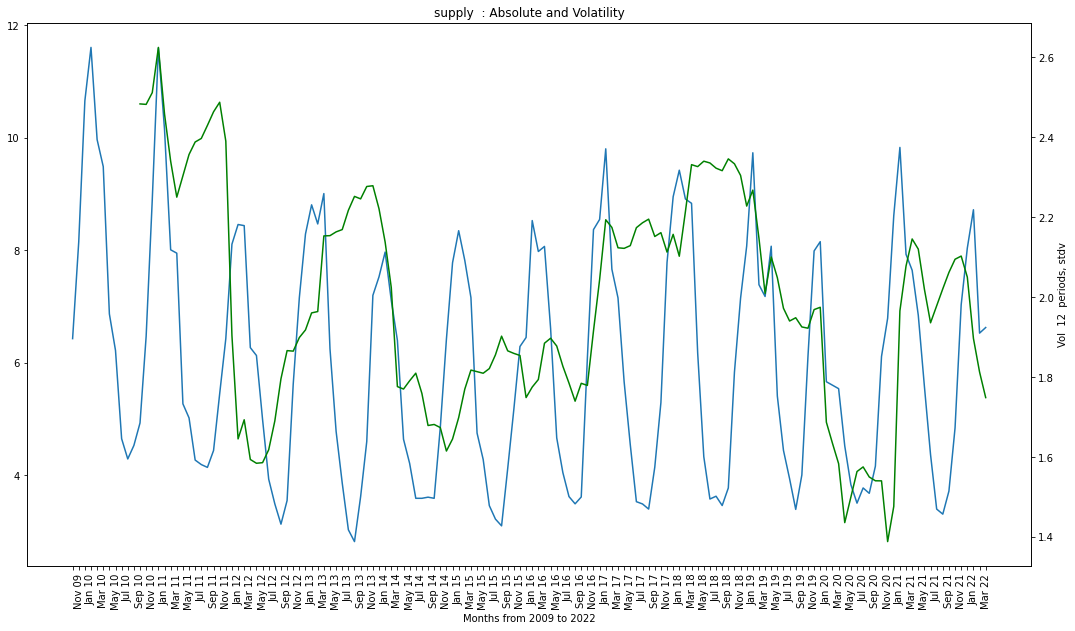

In [5]:
column_names = list(df.columns.values)
year = column_names.pop(0)
for name in column_names:
    print(name)
    col = df[name].values

    price_list=pd.Series(col) 
    var=12  #20 periods
    rollist=price_list.rolling(var) 
    rolvol=rollist.std(ddof=0) 

    plt.figure(figsize=(18, 10))
    plt.plot(df.months,col, label=name)
    plt.xlabel("Months from 2009 to 2022")
    plt.title(name + "  : Absolute and Volatility")
    ax = plt.gca()
    plt.xticks(rotation=90)
    for label in ax.get_xaxis().get_ticklabels()[::2]:
        label.set_visible(False)


    plt2=plt.twinx()
    plt2.plot(rolvol, color="green")
    plt2.set_ylabel("Vol  " + str(var) + "  periods, stdv", color="black")    
    plt.show() 

price_gas price_brent_gbp


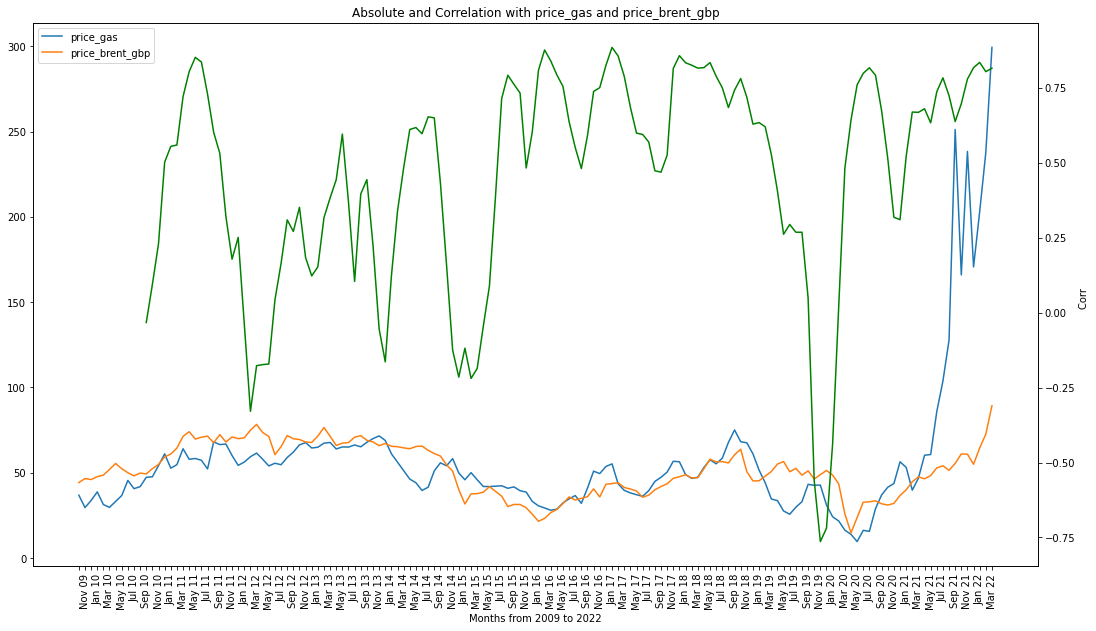

price_gas open_interest_gas


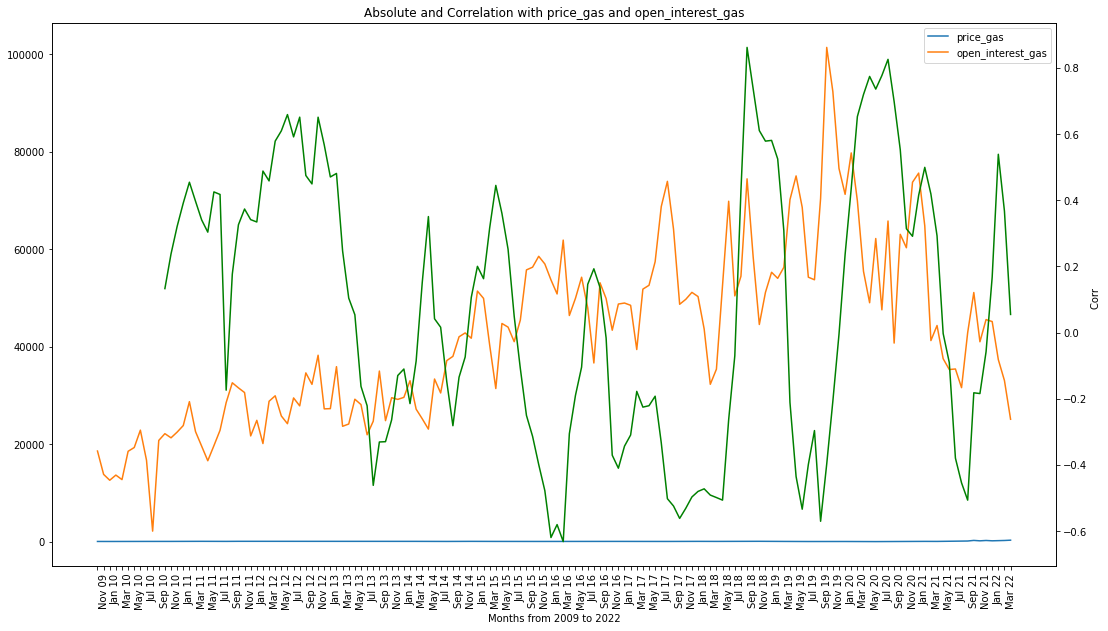

price_gas lng


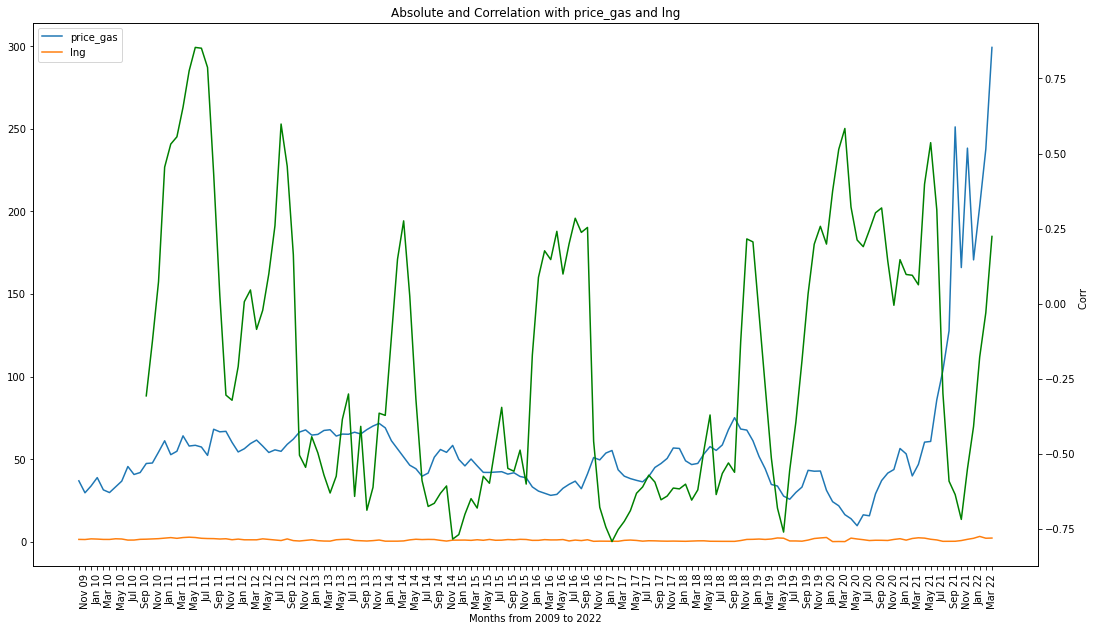

price_gas storage


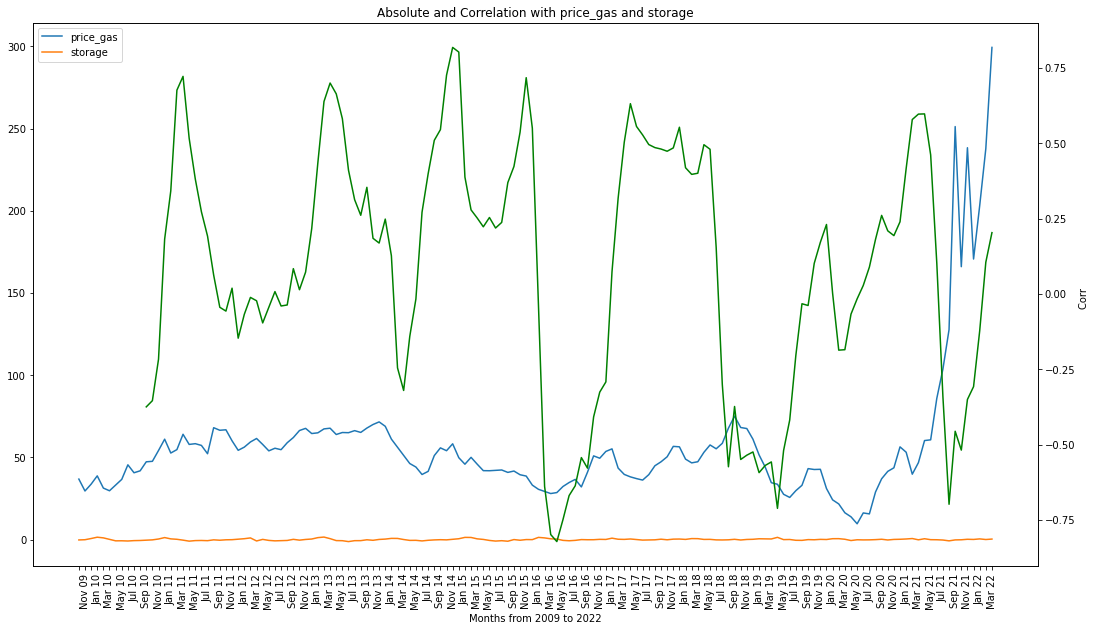

price_gas euas


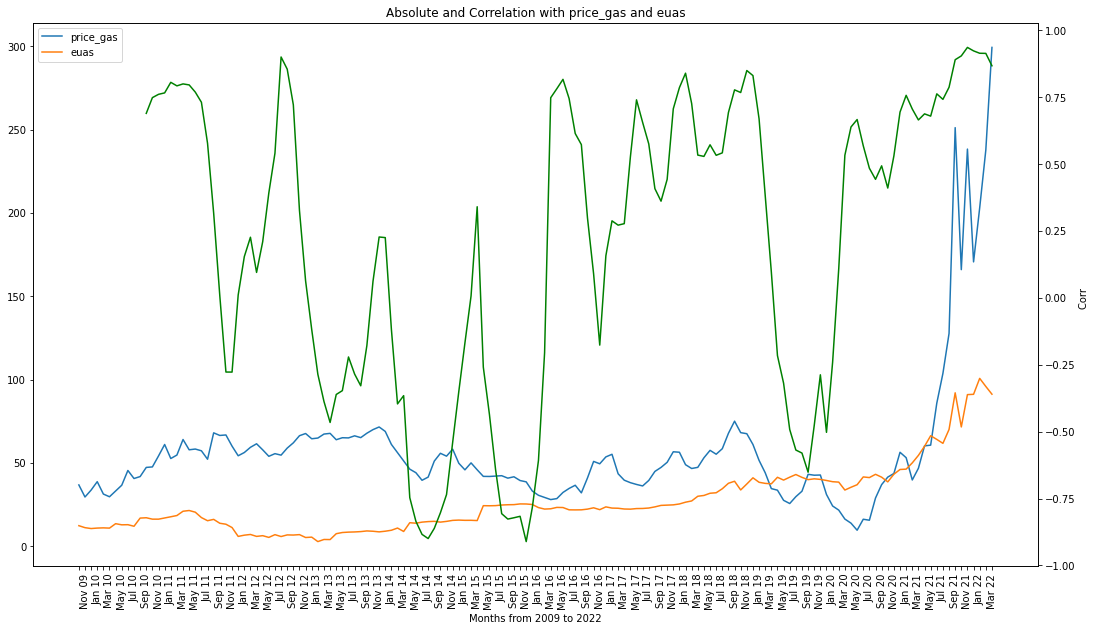

price_gas supply


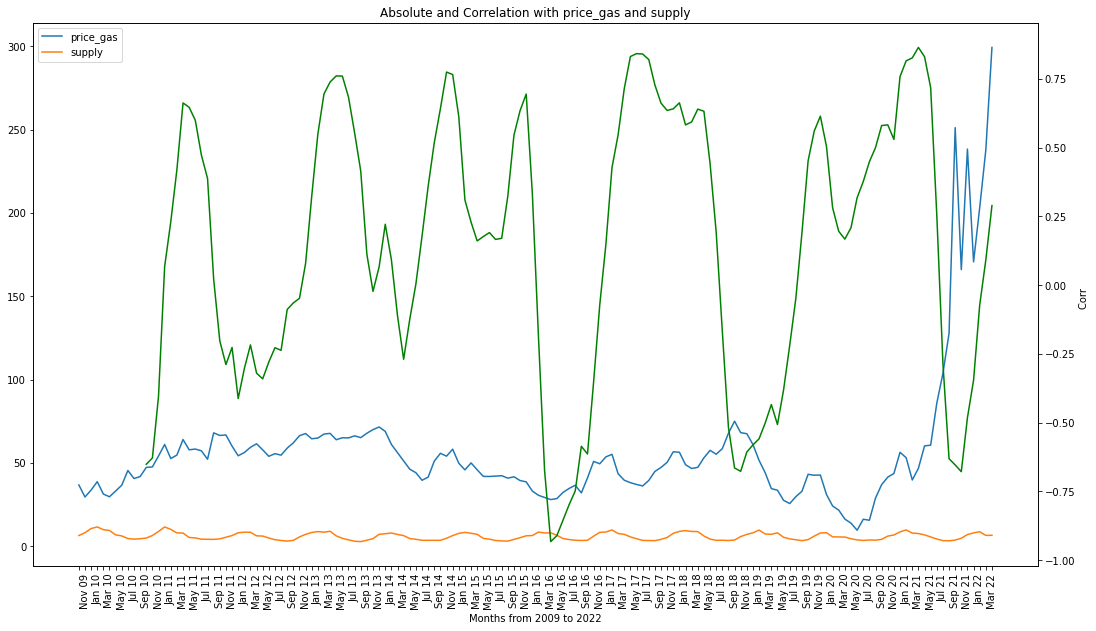

price_brent_gbp open_interest_gas


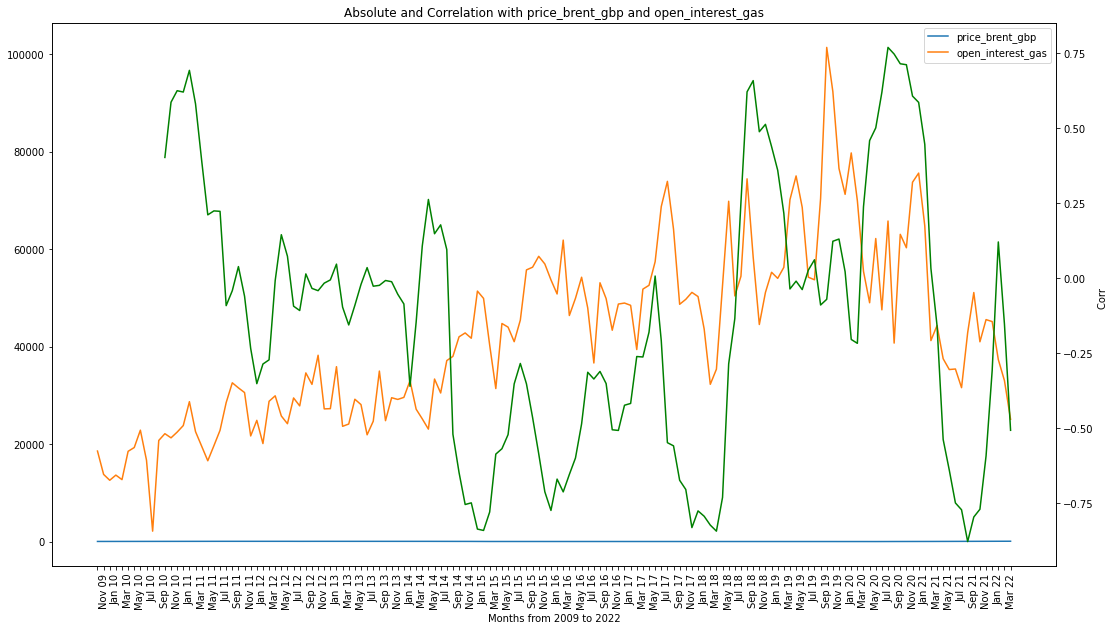

price_brent_gbp lng


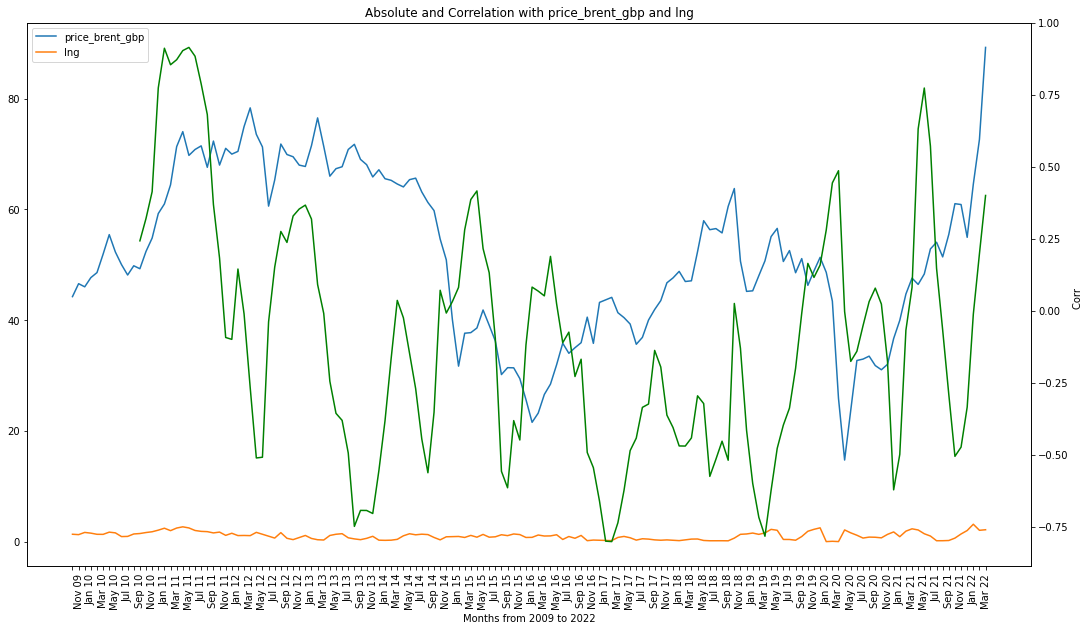

price_brent_gbp storage


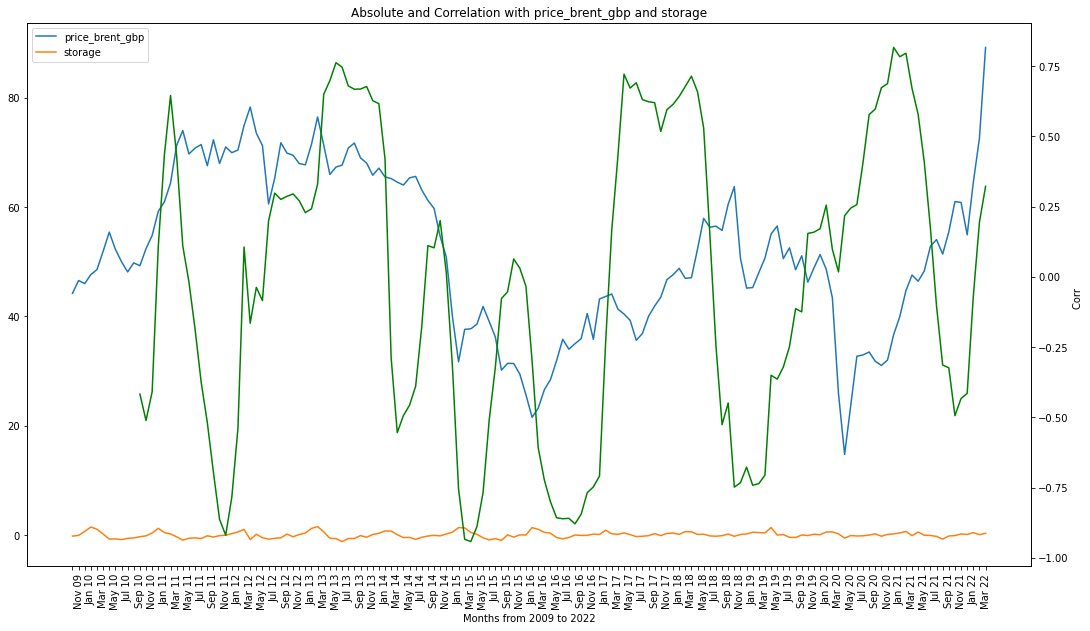

price_brent_gbp euas


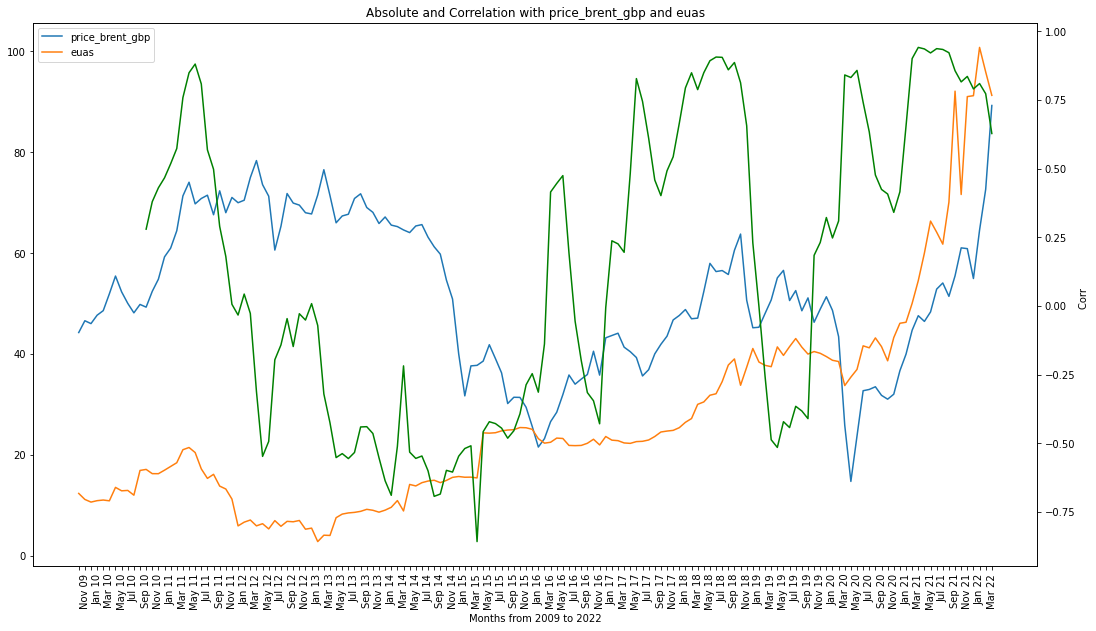

price_brent_gbp supply


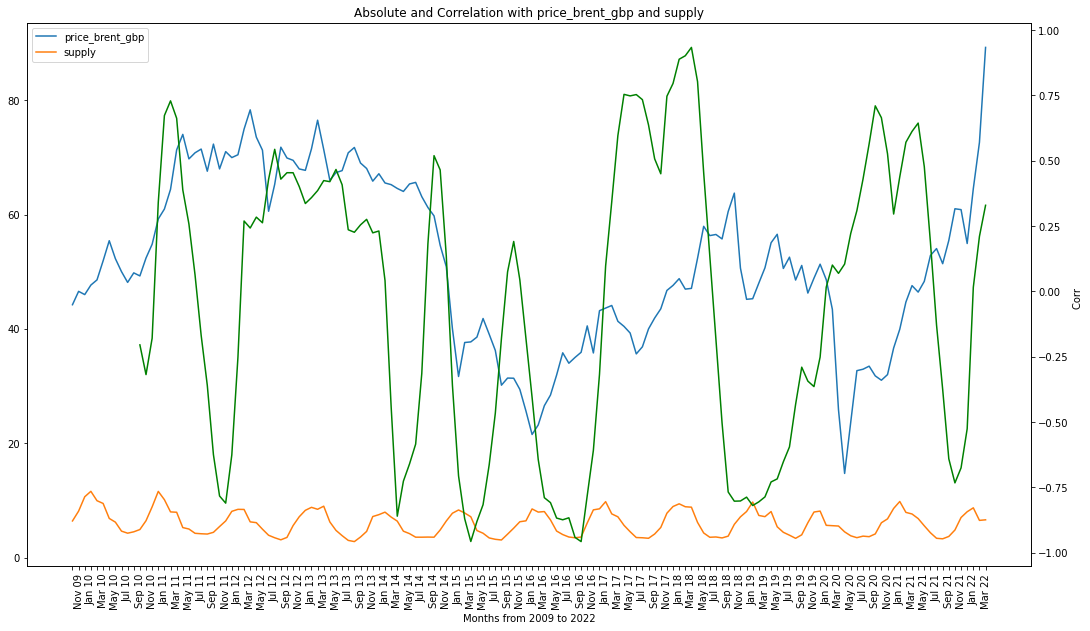

open_interest_gas lng


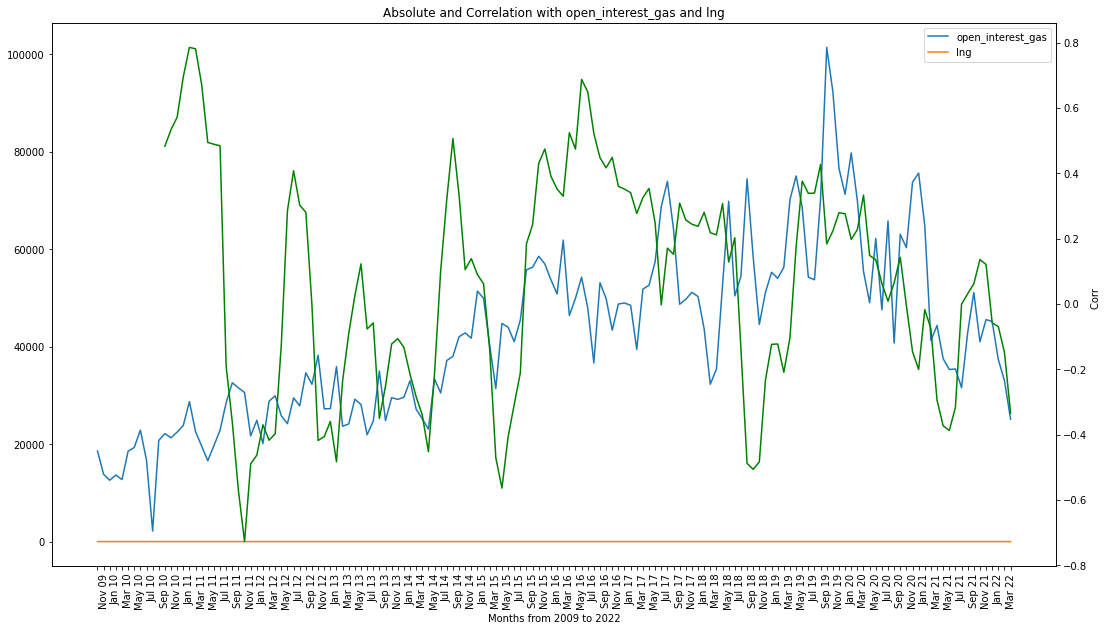

open_interest_gas storage


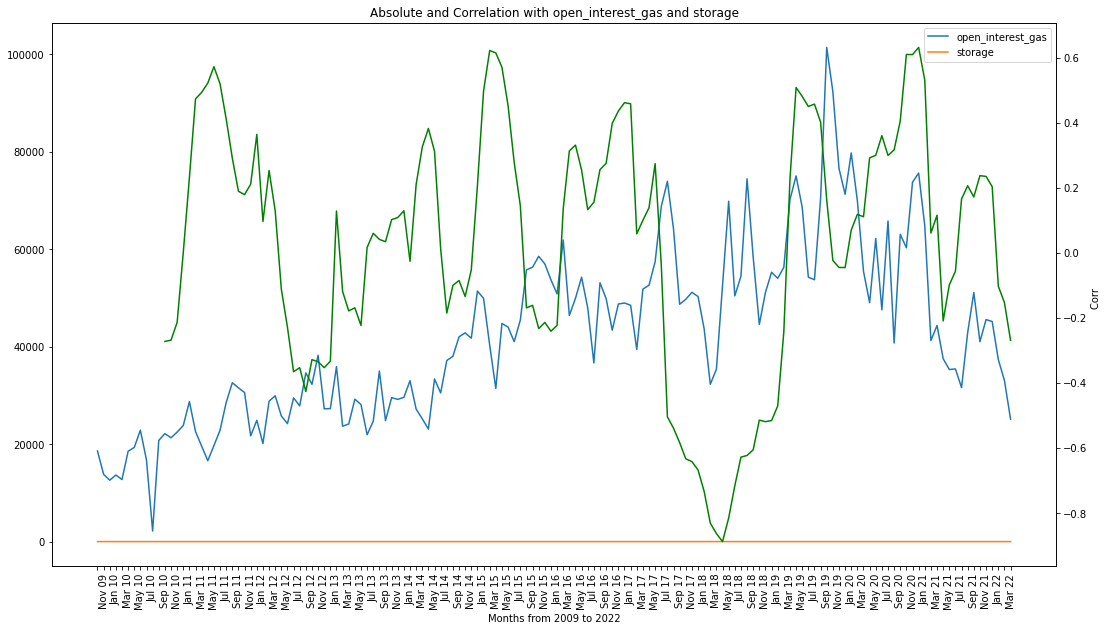

open_interest_gas euas


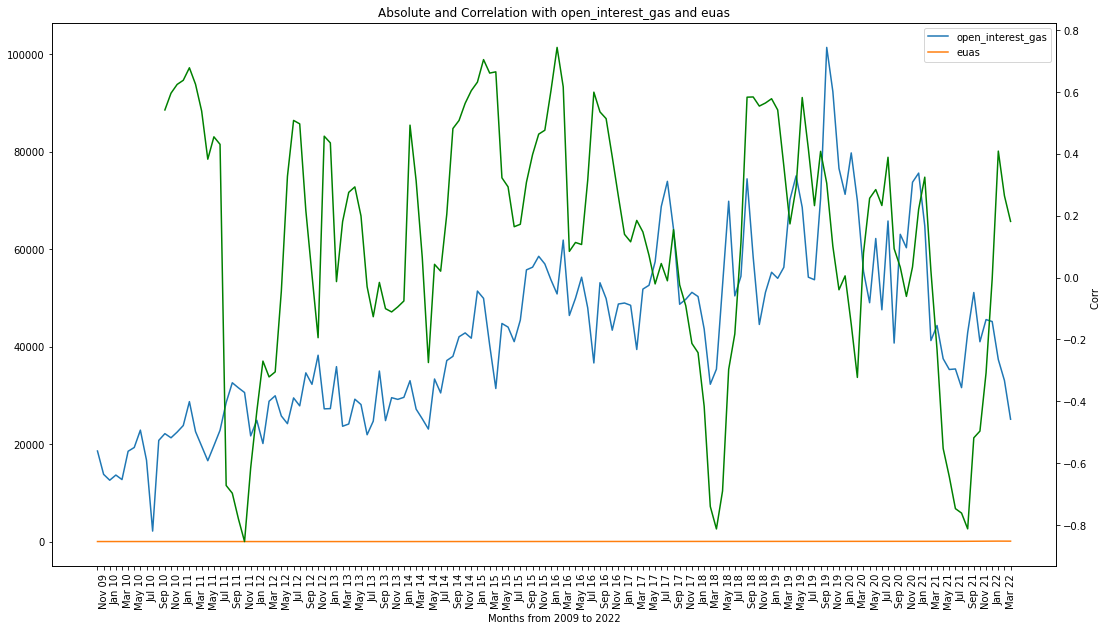

open_interest_gas supply


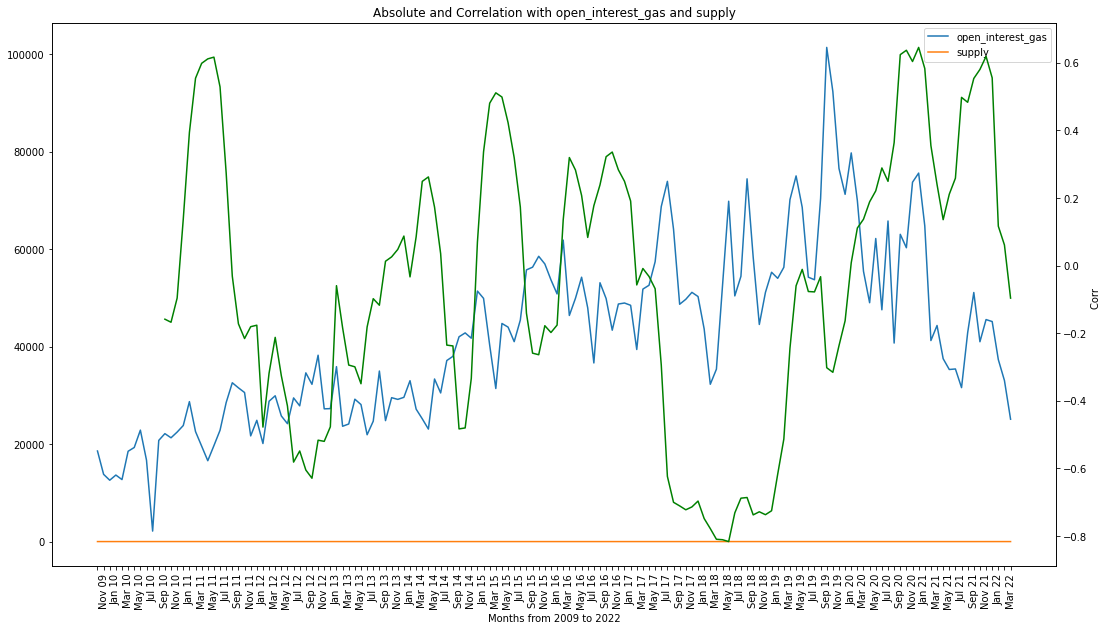

lng storage


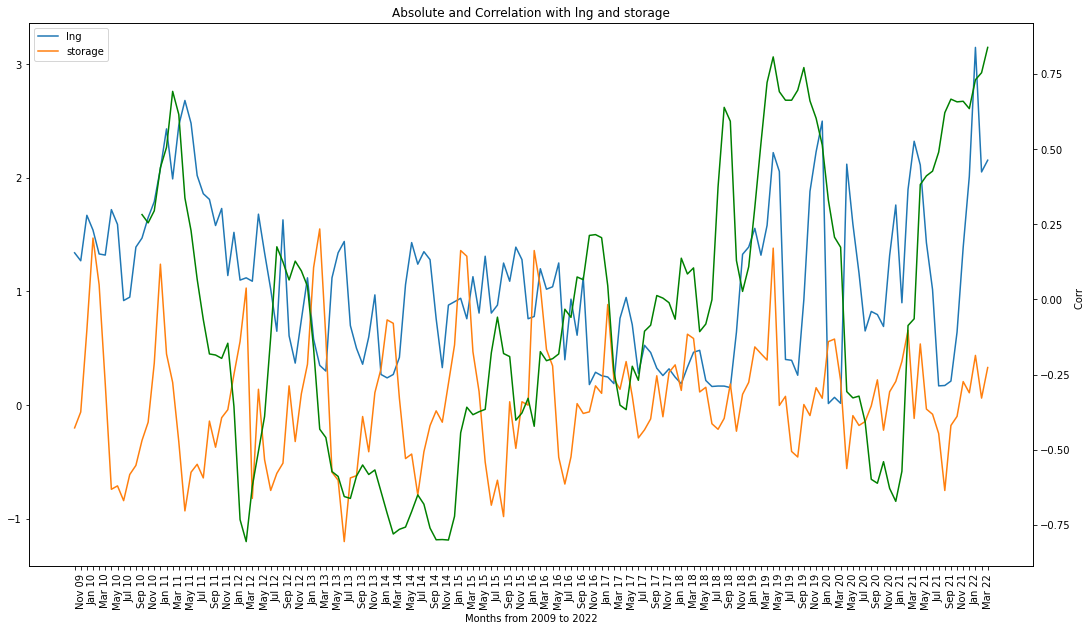

lng euas


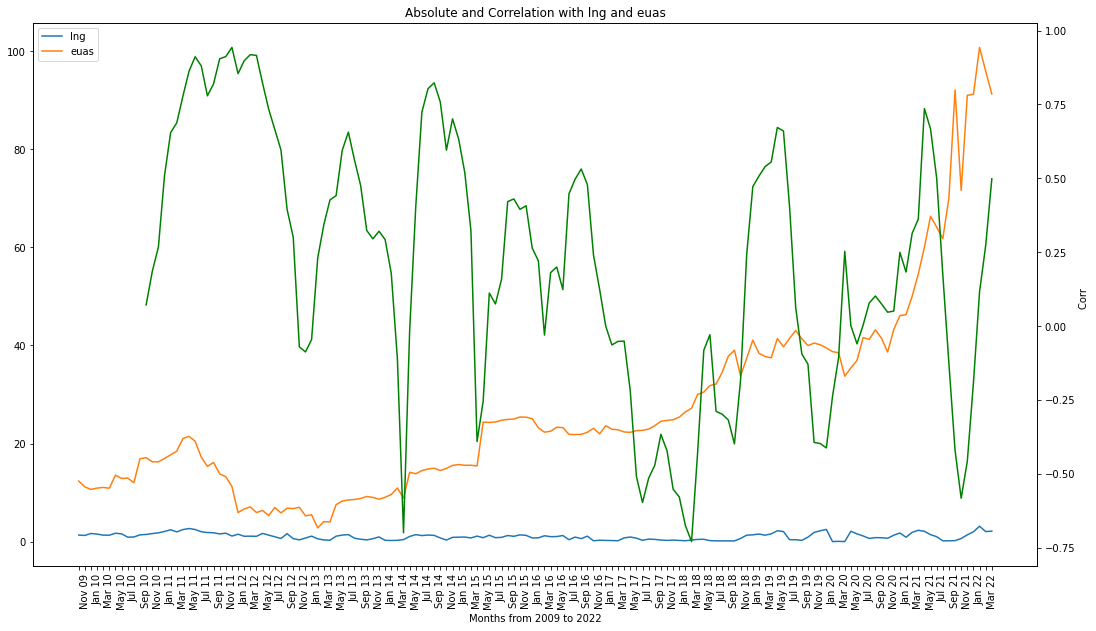

lng supply


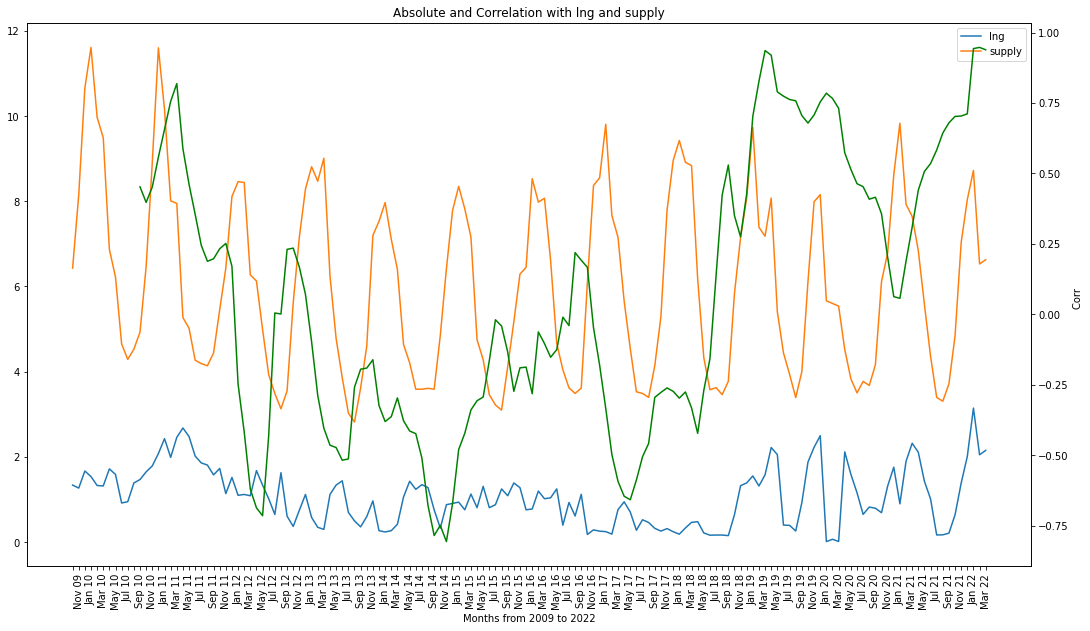

storage euas


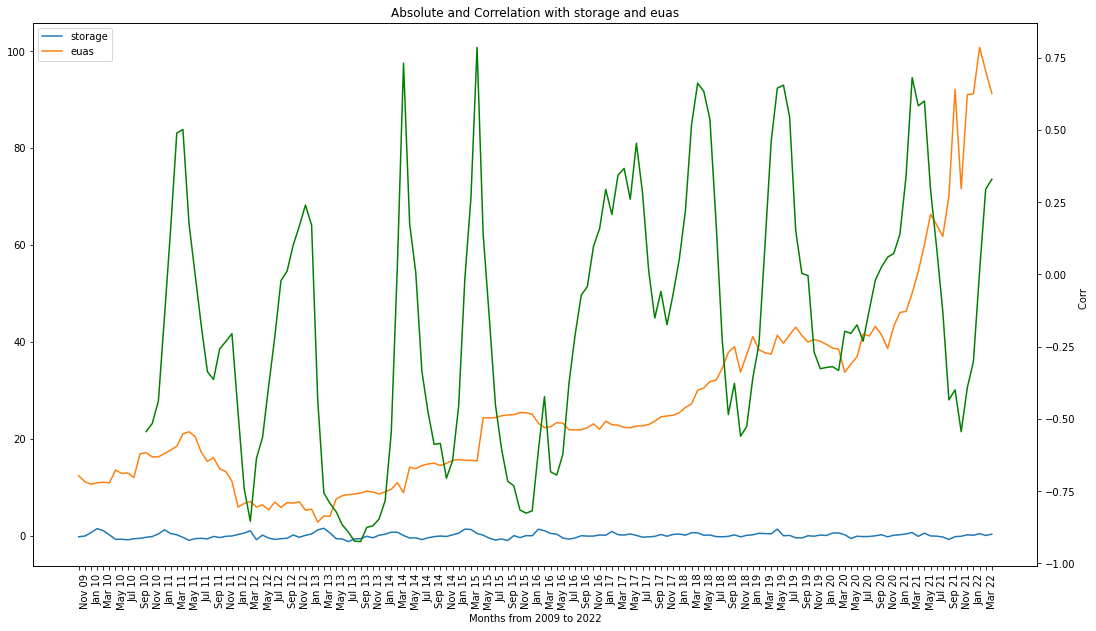

storage supply


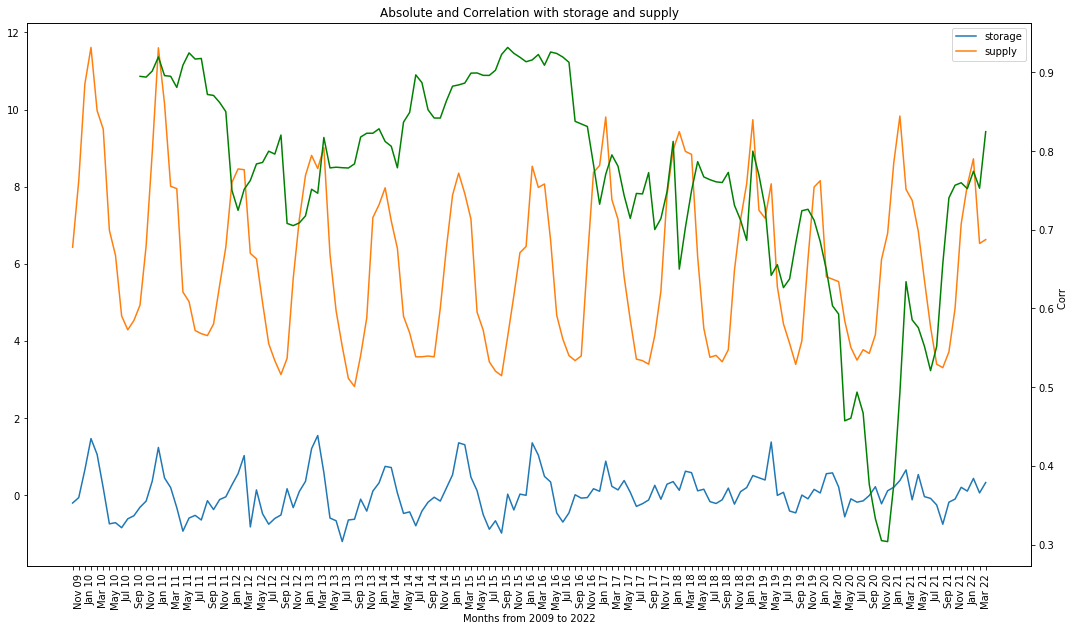

euas supply


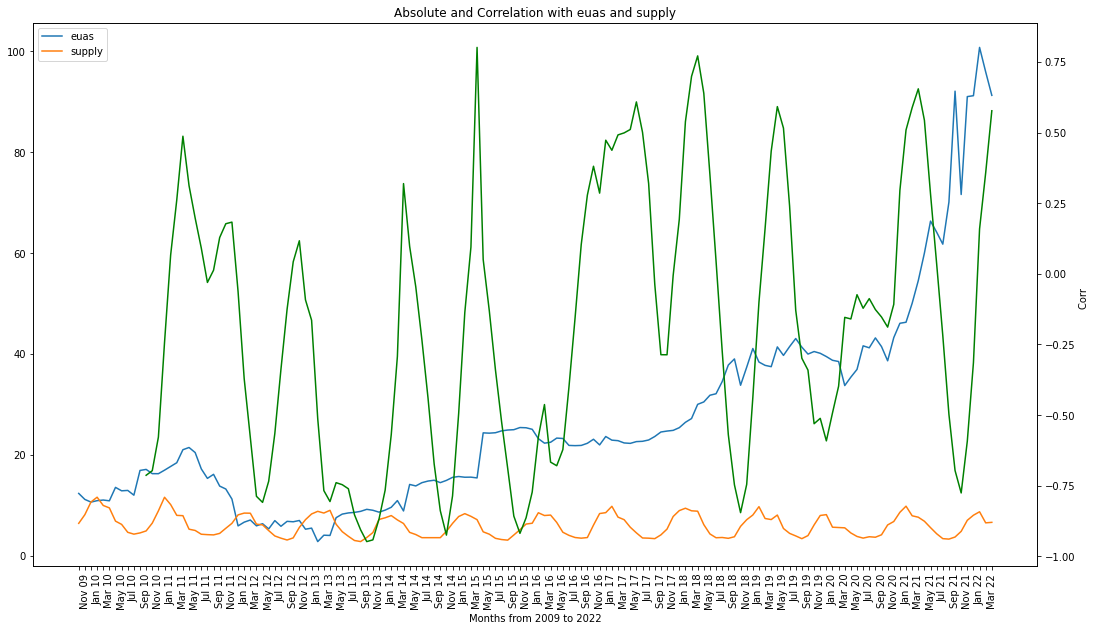

In [6]:
###### Rolling correlation ######

import itertools

comb_obj = itertools.combinations(column_names, 2)
comb_list = list(comb_obj)
# comb_list is all the 2 length combinations of the list of column names

length_rolling=12

for combination in comb_list:
    val1=combination[0]
    val2=combination[1]
    print(val1,val2)
    correlation = df[str(val1)].rolling(length_rolling).corr(df[str(val2)]) 
    # print(correlation)

    plt.figure(figsize=(18, 10))

    plt.plot(df.months,df[val1], label=str(val1))
    plt.plot(df.months,df[val2], label=str(val2))

    plt.xlabel("Months from 2009 to 2022")
    plt.title("Absolute and Correlation with " + val1 + " and " + val2)
    plt.legend()

    ax = plt.gca()
    plt.xticks(rotation=90)
    for label in ax.get_xaxis().get_ticklabels()[::2]:
        label.set_visible(False)


    plt2=plt.twinx()
    plt2.plot(correlation, color="green")
    plt2.set_ylabel("Corr  ", color="black")    
    plt.show() 

    